In [1]:
%matplotlib notebook
import h5py
import os
import numpy as np
import matplotlib.pyplot as plt
import utils

In [5]:
base_dir = '/home/david/git/LadderVAE/out'

In [6]:
def filt(x, window_size=100):
    y = np.convolve(x, np.ones((window_size,))/window_size, mode='same')
    return y

In [89]:
!dir out/

20190906-232419  20190907-141501  20190907-222755  20190909-100208
20190907-095555  20190907-142413  20190908-043304  20190909-155058
20190907-115748  20190907-155254  20190908-130427


In [91]:
def load(base_dir, dir_names):
    stats = dict()
    for d in dir_names:
        filename = os.path.join(base_dir, d, 'stat.h5')
        with h5py.File(filename, 'r') as f:
            stat = utils.Stat(f).load()
        stats[d] = stat
    return stats

def plot_field(res, field):
    plt.figure(figsize=(10, 8), dpi= 80)
    for r in res:
        #print(r)
        plt.plot(res[r].current[field])
    _ = plt.legend(res.keys())
    
def load_params(base_dir, dir_names):
    params = dict()
    for d in dir_names:
        filename = os.path.join(base_dir, d, 'parameters.h5')
        with h5py.File(filename, 'r') as f:
            pd = dict()
            for k in f:
                pd[k] = f[k].value
            params[d] = pd
    return params

def get_param_legend(params, format_str, fields):
    pl = []
    for p in params.values():
        lst = [ p[f] for f in fields ]
        ls = format_str % tuple(lst)
        pl += [ ls ]
    return pl

In [93]:
dirs = ['20190907-155254', '20190907-222755', '20190908-043304', '20190908-130427', '20190909-100208']
res = load(base_dir, dirs)
params = load_params(base_dir, dirs)
legend = get_param_legend(params, '%s  %s', ['model_type', 'nrof_stochastic_units'])

eval_elbo: (2000, 1)
eval_kl_0: (2000, 1)
eval_kl_1: (2000, 1)
eval_kl_tot: (2000, 1)
eval_log_px: (2000, 1)
eval_log_pz_0: (2000, 1)
eval_log_pz_1: (2000, 1)
eval_log_qz_0: (2000, 1)
eval_log_qz_1: (2000, 1)
train_elbo: (2000, 1)
train_kl_0: (2000, 1)
train_kl_1: (2000, 1)
train_kl_tot: (2000, 1)
train_log_px: (2000, 1)
train_log_pz_0: (2000, 1)
train_log_pz_1: (2000, 1)
train_log_qz_0: (2000, 1)
train_log_qz_1: (2000, 1)
eval_elbo: (2000, 1)
eval_kl_0: (2000, 1)
eval_kl_1: (2000, 1)
eval_kl_2: (2000, 1)
eval_kl_tot: (2000, 1)
eval_log_px: (2000, 1)
eval_log_pz_0: (2000, 1)
eval_log_pz_1: (2000, 1)
eval_log_pz_2: (2000, 1)
eval_log_qz_0: (2000, 1)
eval_log_qz_1: (2000, 1)
eval_log_qz_2: (2000, 1)
train_elbo: (2000, 1)
train_kl_0: (2000, 1)
train_kl_1: (2000, 1)
train_kl_2: (2000, 1)
train_kl_tot: (2000, 1)
train_log_px: (2000, 1)
train_log_pz_0: (2000, 1)
train_log_pz_1: (2000, 1)
train_log_pz_2: (2000, 1)
train_log_qz_0: (2000, 1)
train_log_qz_1: (2000, 1)
train_log_qz_2: (2000, 1)
e

In [46]:
res

{'20190907-155254': <utils.Stat at 0x7f972d4031d0>,
 '20190907-222755': <utils.Stat at 0x7f972e082320>,
 '20190908-043304': <utils.Stat at 0x7f972d403c18>,
 '20190908-130427': <utils.Stat at 0x7f972d403eb8>}

In [20]:
import re

#str = '*Epoch=4999	Time=33.09	LR=0.00200	E_qsamples=1	IVAEsamples=1	temp: 1.00	TRAIN:	Cost=-85.84437	logp(x|z1)=-61.05516	log p(z): -81.585|-45.422	log q(z): -70.604|-31.614'
epoch, t, elbo, log_px, log_pz_0, log_pz_1, log_qz_0, log_qz_1 = [], [], [], [], [], [], [], []
with open('../LVAE/outfolder_20190811/trainlogfile.log') as f: 
    for mystr in f.readlines():
        lx = re.split('=| |\t|\|', mystr)
        epoch += [int(lx[1])]
        t += [float(lx[3])]
        elbo += [float(lx[14])]
        log_px += [float(lx[17])]
        log_pz_0 += [float(lx[20])]
        log_pz_1 += [float(lx[21])]
        log_qz_0 += [float(lx[20])]
        log_qz_1 += [float(lx[21])]
epoch = np.array(epoch)
elbo = np.array(elbo)
log_px = np.array(log_px)
log_pz_0 = np.array(log_pz_0)
log_pz_1 = np.array(log_pz_1)
log_qz_0 = np.array(log_qz_0)
log_qz_1 = np.array(log_qz_1)


<IPython.core.display.Javascript object>


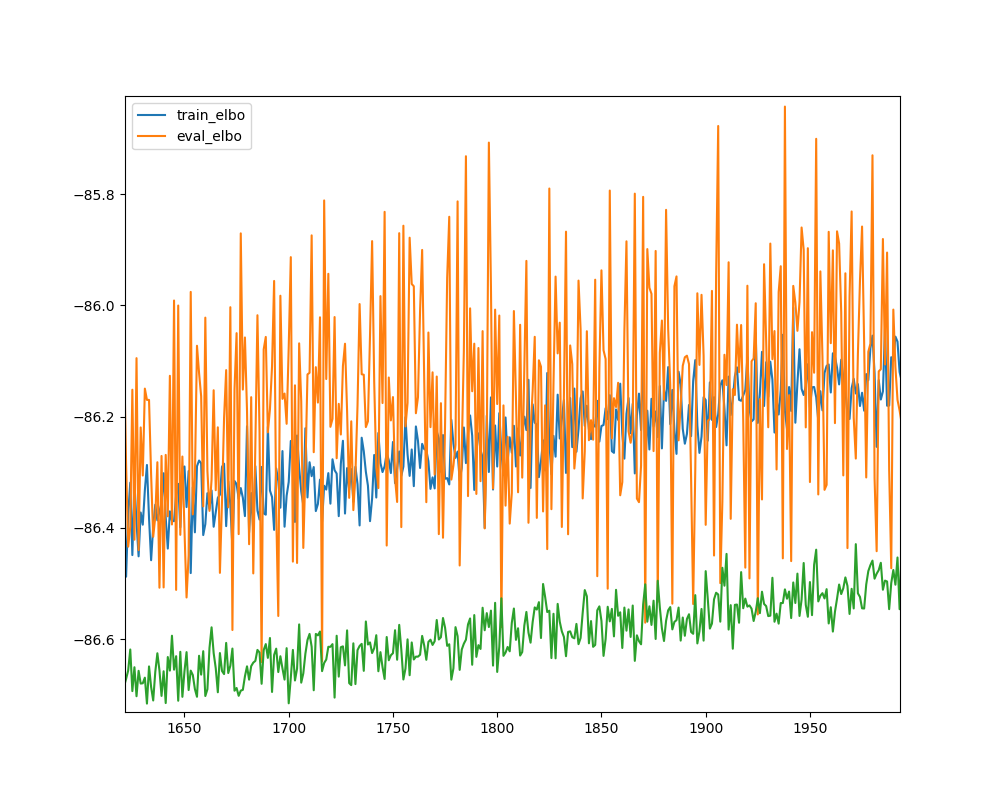

In [38]:
plt.figure(figsize=(10, 8), dpi= 80)
plot_keys =  [ 'train_elbo', 'eval_elbo' ]
for key in plot_keys:
    plt.plot(stat.current[key])
plt.ylim([-200, 100])
_ = plt.legend(plot_keys)
x = np.arange(0, elbo.shape[0])
plt.plot(x, elbo)


<IPython.core.display.Javascript object>


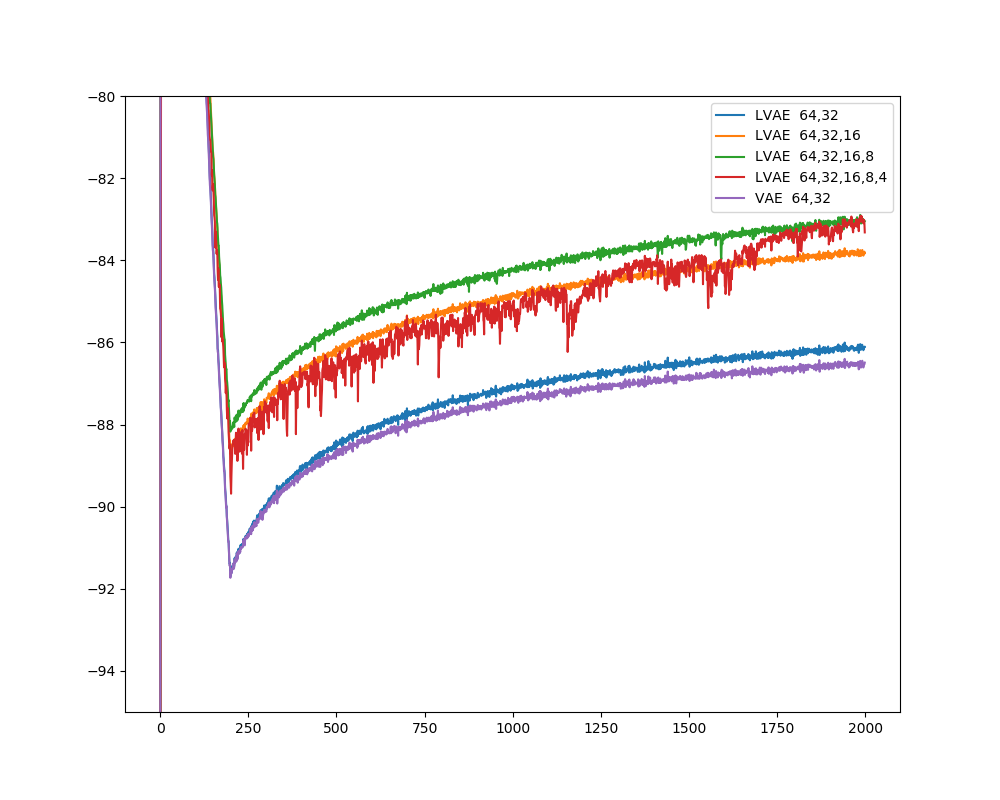

In [94]:
plot_field(res, 'train_elbo')
plt.ylim([-95, -80])
plt.legend(legend)

<IPython.core.display.Javascript object>


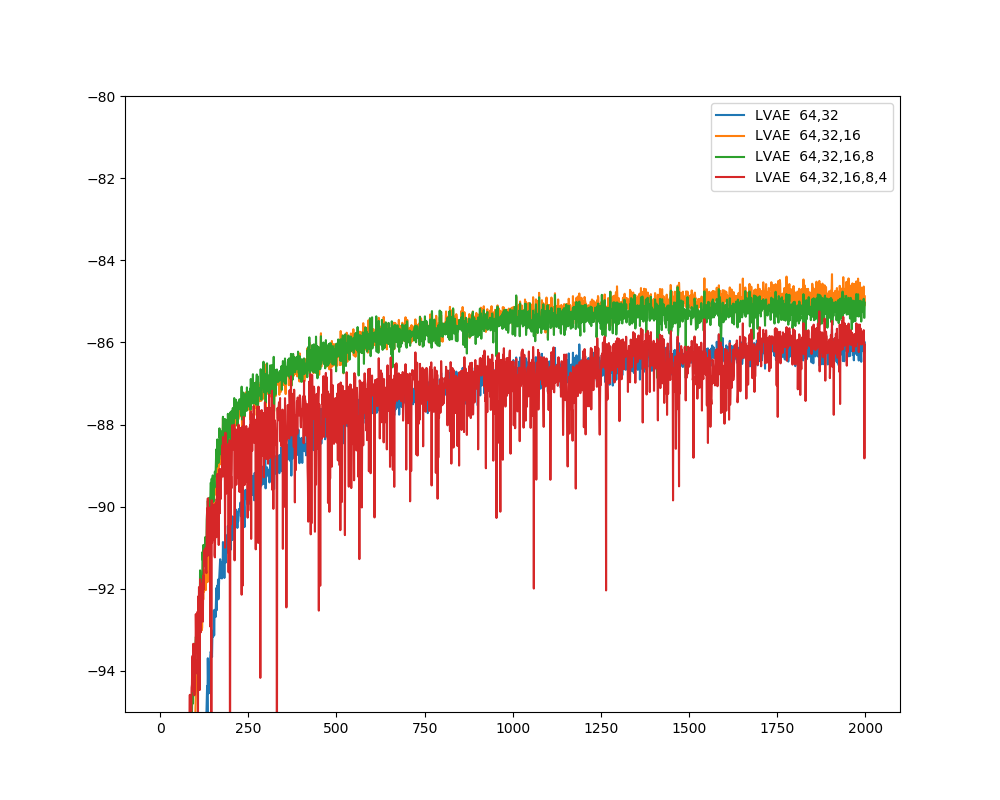

20190907-155254
20190907-222755
20190908-043304
20190908-130427


In [88]:
plot_field(res, 'eval_elbo')
plt.ylim([-95, -80])
plt.legend(legend)